#Introducción al proyecto#
En este proyecto hemos desarrollado una neural network que dada una imagen con una cara, es capaz de decirnos con precisión cuál es la emoción que siente la persona.

Este dataset contiene 28709 imágenes de entrenamiento y 3589 de test, clasificadas entre 7 posibles emociones distintas: sorpresa, tristeza, neutral, felicidad, miedo, disgusto y enfado.

#Dependencias#

In [1]:
import copy
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from google.colab import drive
from os import sep

# For images
"""
import torch

from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch.utils import data

import torch.optim as optim

import torchvision.models as models

"""

from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf




#Presets#


In [2]:
%ls
dow=True #descomprimir directamente en google collab y en el caso, descargar el zip del dataset


sample_data/


In [10]:
if dow:

  PROJECT_NAME = 'face_expresion'


  PROJECT_ROUTE = 'drive' + sep + 'MyDrive' + sep + 'PAIA' + sep + 'projects' + sep + PROJECT_NAME + sep


  PATH_ALL = ''

  PATH_TRAIN = PROJECT_ROUTE + 'train' + sep
  print(PATH_TRAIN)
  PATH_TEST = PROJECT_ROUTE + 'test' + sep

  drive.mount('/content/drive')

  %ls
  %cd $PROJECT_ROUTE

drive/MyDrive/PAIA/projects/face_expresion/train/
Mounted at /content/drive
drive/  sample_data/
/content/drive/MyDrive/PAIA/projects/face_expresion


In [11]:
 if dow:
  !ls -1


2_0FACE_EXPRESION_EnricAdrian.ipynb
aadbcarpetas_comprimidas.zip.zip
betaFACE_EXPRESION_EnricAdrian.ipynb
'Copia de Copia de FINAL_good_face_expresion_clean.ipynb'
'Copia de FINAL_good_face_expresion_clean.ipynb'
'Copia de test1.ipynb'
'Copia de test3.ipynb'
'Copia de test6.ipynb'
'Copia de test9PROBAR.ipynb'
dataset
emotion-detection-fer.zip
'face_expresion_adrianenric (5).ipynb'
face_expresion_adrianenricold.ipynb
face_expresion_clean.ipynb
FACE_EXPRESION_EnricAdrian_1.ipynb
FACE_EXPRESION_EnricAdrian.ipynb
'FIN1 (1).ipynb'
final1v4.ipynb
finalFACE_EXPRESION_EnricAdrian.ipynb
FINAL_good_face_expresion_clean.ipynb
FINALWORKtest10.ipynb
'good_face_expresion_clean (3).ipynb'
kaggle.json
prueba.ipynb
test
test1.ipynb
test2.ipynb
test3.ipynb
test4.ipynb
test5.ipynb
test6.ipynb
test7.ipynb
test8PROBAR.ipynb
test9PROBAR.ipynb
train


In [15]:
if dow:
  %ls
  #Para descargar el .zip de las fotos:
  #Es necesario descargar kagle.json de la web de kaggle :
  # https://www.kaggle.com/settings y create new token.
  !pip install -q kaggle # anteriormente aparecia el error ya que estaba descargado el zip y no teniamos ya el archivo kaggle.json para evitar que se volviera a descargar, pero no influia en el funcionamiento.
  !cp kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json

 2_0FACE_EXPRESION_EnricAdrian.ipynb
 aadbcarpetas_comprimidas.zip.zip
 betaFACE_EXPRESION_EnricAdrian.ipynb
'Copia de Copia de FINAL_good_face_expresion_clean.ipynb'
'Copia de FINAL_good_face_expresion_clean.ipynb'
'Copia de test1.ipynb'
'Copia de test3.ipynb'
'Copia de test6.ipynb'
'Copia de test9PROBAR.ipynb'
 dataset/
 emotion-detection-fer.zip
'face_expresion_adrianenric (5).ipynb'
 face_expresion_adrianenricold.ipynb
 face_expresion_clean.ipynb
 FACE_EXPRESION_EnricAdrian_1.ipynb
 FACE_EXPRESION_EnricAdrian.ipynb
'FIN1 (1).ipynb'
 final1v4.ipynb
 finalFACE_EXPRESION_EnricAdrian.ipynb
 FINAL_good_face_expresion_clean.ipynb
 FINALWORKtest10.ipynb
'good_face_expresion_clean (3).ipynb'
 kaggle.json
 prueba.ipynb
 test/
 test1.ipynb
 test2.ipynb
 test3.ipynb
 test4.ipynb
 test5.ipynb
 test6.ipynb
 test7.ipynb
 test8PROBAR.ipynb
 test9PROBAR.ipynb
 train/


In [13]:
if dow:
  os.system("kaggle datasets download -d ananthu017/emotion-detection-fer")
%ls

 2_0FACE_EXPRESION_EnricAdrian.ipynb
 aadbcarpetas_comprimidas.zip.zip
 betaFACE_EXPRESION_EnricAdrian.ipynb
'Copia de Copia de FINAL_good_face_expresion_clean.ipynb'
'Copia de FINAL_good_face_expresion_clean.ipynb'
'Copia de test1.ipynb'
'Copia de test3.ipynb'
'Copia de test6.ipynb'
'Copia de test9PROBAR.ipynb'
 dataset/
 emotion-detection-fer.zip
'face_expresion_adrianenric (5).ipynb'
 face_expresion_adrianenricold.ipynb
 face_expresion_clean.ipynb
 FACE_EXPRESION_EnricAdrian_1.ipynb
 FACE_EXPRESION_EnricAdrian.ipynb
'FIN1 (1).ipynb'
 final1v4.ipynb
 finalFACE_EXPRESION_EnricAdrian.ipynb
 FINAL_good_face_expresion_clean.ipynb
 FINALWORKtest10.ipynb
'good_face_expresion_clean (3).ipynb'
 kaggle.json
 prueba.ipynb
 test/
 test1.ipynb
 test2.ipynb
 test3.ipynb
 test4.ipynb
 test5.ipynb
 test6.ipynb
 test7.ipynb
 test8PROBAR.ipynb
 test9PROBAR.ipynb
 train/


In [16]:
if dow:
  import zipfile
  with zipfile.ZipFile("emotion-detection-fer.zip", "r") as zip_ref:
      zip_ref.extractall('/content/')



In [17]:
if dow:
  %cd '/content/'
  %ls

/content
drive/  sample_data/  test/  train/


In [18]:
if dow:
  %ls
  %cd train
  %ls
  !du -a | cut -d/ -f2 | sort | uniq -c | sort -nr
  %cd ..
  %cd test
  %ls
  !du -a | cut -d/ -f2 | sort | uniq -c | sort -nr
  %cd ..
  %ls

drive/  sample_data/  test/  train/
/content/train
angry/  disgusted/  fearful/  happy/  neutral/  sad/  surprised/
   7216 happy
   4966 neutral
   4831 sad
   4098 fearful
   3996 angry
   3172 surprised
    437 disgusted
      1 115704	.
/content
/content/test
angry/  disgusted/  fearful/  happy/  neutral/  sad/  surprised/
   1775 happy
   1248 sad
   1234 neutral
   1025 fearful
    959 angry
    832 surprised
    112 disgusted
      1 28952	.
/content
drive/  sample_data/  test/  train/


In [19]:
%ls

drive/  sample_data/  test/  train/


#Data Preprocessing¶#



In [ ]:
ordered_class_names = ['surprised','sad','neutral','happy','fearful','disgusted','angry']
train_dir= 'train/'
validation_dir= 'test/'

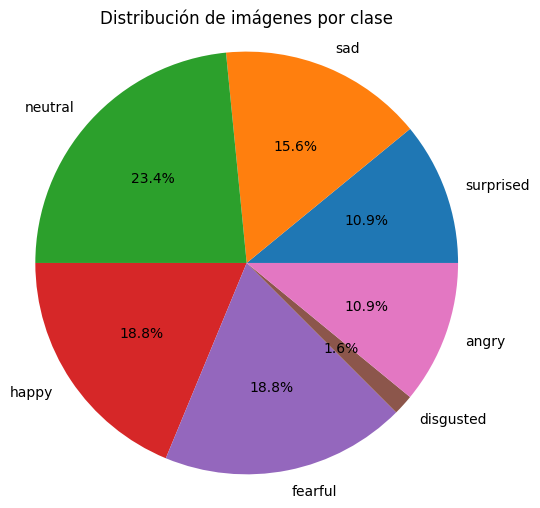

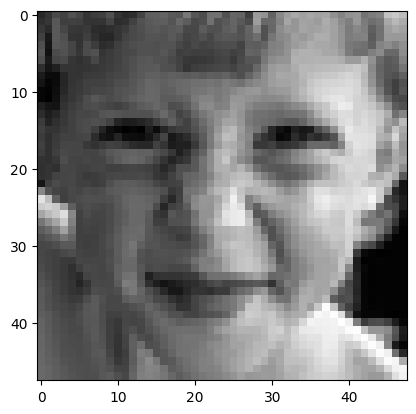

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "test/disgusted/im21.png"
img = Image.open(img_path).convert("L")  # Open image and convert to grayscale
img = img.resize((48, 48))  # Resize image to desired size

plt.imshow(img, cmap='gray')
plt.axis('on')
plt.show('on')


*Las imagenes que componen el dataset son de 48x48 pixels en escala de grises
de caras de personas*

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creación del generador de aumento  de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Escalado de los valores de los píxeles para que estén entre 0 y 1
    validation_split=0.3,        # Porcentaje de imágenes reservadas para validación
    rotation_range=10,           # Rango de rotación de la imagen en grados (-10 a 10)
    width_shift_range=0.1,       # Rango de desplazamiento horizontal aleatorio (-10% a 10% del ancho de la imagen)
    height_shift_range=0.2,      # Rango de desplazamiento vertical aleatorio (-20% a 20% de la altura de la imagen)
    zoom_range=0.2,              # Rango de zoom aleatorio
    shear_range=0.2,             # Rango de cizallamiento aleatorio (ángulo de cizallamiento: -20° a 20°)
    fill_mode='nearest'          # Estrategia de relleno de nuevos píxeles creados durante las transformaciones
)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.9, #Hemos aplicado ese 0,9 para aumentar el numero de imagenes para el test porque habia mucha diferencia con el train

)



*Aplicamos  el data argumentation a las imágenes mientras las leemos desde sus respectivos directorios y las clasificamos como imagenes en escala de grises de tamaño 48x48*



In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (48,48),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training",
                                                   )

Found 20099 images belonging to 7 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory( directory = validation_dir,
                                                              target_size = (48,48),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation",
                                                              shuffle=False
                                                             )

Found 6456 images belonging to 7 classes.


# Ejemplos imagenes del train procesadas
---
 * Podemos observar que si usamos el shear_range y con el fill_mode = nearest, las zonas de las imagenes que deformamos, se "pixelean" y permite centrarnos más en las caras.
 * Aplicamos el zoom_range aleatorio ya que hay algunas fotos con caras más lejanas.
 * Mediante el reesclado de pixeles facilitamos el proceso de entrenamiento.

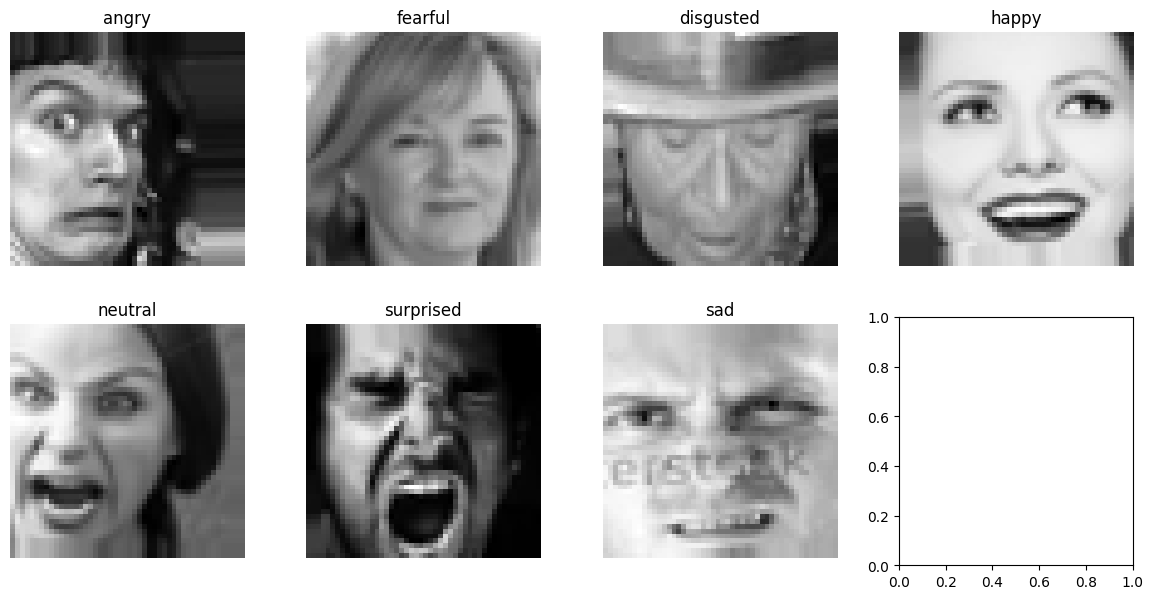

In [ ]:
import matplotlib.pyplot as plt

# Crear un diccionario para almacenar una imagen de cada clase
class_images = {}

# Recorrer el generador de imágenes hasta que se obtenga al menos una imagen de cada clase
for images, labels in train_generator:
    # Obtener las etiquetas numéricas de las imágenes
    label_indices = labels.argmax(axis=1)

    # Recorrer las etiquetas numéricas
    for i, label_idx in enumerate(label_indices):
        # Verificar si ya se ha obtenido una imagen de esta clase
        if label_idx not in class_images:
            # Obtener la imagen y convertirla a matriz
            image = images[i].reshape(48, 48)

            # Almacenar la imagen de la clase correspondiente
            class_images[label_idx] = image

    # Verificar si se ha obtenido una imagen de cada clase
    if len(class_images) == len(ordered_class_names):
        break

# Configurar la visualización de imágenes en múltiples filas y columnas
num_images_per_row = 4
num_rows = (len(class_images) + num_images_per_row - 1) // num_images_per_row

# Crear las subtramas y mostrar las imágenes
fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(12, 3 * num_rows))
fig.tight_layout()

for idx, (label_idx, image) in enumerate(class_images.items()):
    class_name = ordered_class_names[label_idx]
    row_idx = idx // num_images_per_row
    col_idx = idx % num_images_per_row

    axes[row_idx, col_idx].imshow(image, cmap='gray')
    axes[row_idx, col_idx].set_title(class_name)
    axes[row_idx, col_idx].axis('off')

plt.show('off')


#Primera fase del modelaje#

Creamos tres capas convolucionales: Una con 8 filtros de tamaño 3x3, otra con 16 y la última con 32. La función de activación 'relu' se aplica a las salidas de esta capas. La capas convolucionales se utilizan para extraer características de las imágenes de entrada.

\
También se crean tres capas de reducción de muestreo que reducen la dimensión espacial de las características extraídas por las capas convolucionales.
Utilizan una operación de agrupación máxima (max pooling) para seleccionar el valor máximo en cada ventana de tamaño 2x2. Esto ayuda a reducir la cantidad de parámetros y a resumir las características más importantes.

\
 La capa Dense(64, relu) es una capa (completamente conectada) con 64 neuronas y una función de activación 'relu'. Es responsable de aprender relaciones más complejas en los datos y realizar la clasificación.

 \
Dense(num_classes, softmax) es la capa de salida final. Tiene un número de neuronas igual al número de clases en el problema. Utiliza la función de activación 'softmax' para generar una distribución de probabilidad sobre las clases, donde cada valor representa la probabilidad de que una imagen pertenezca a una clase específica.


In [ ]:
num_classes = len(ordered_class_names)  # Número de clases de salida
input_shape = (48, 48, 1)  # Formato de entrada

model1 = tf.keras.Sequential([

    # Capa convolucional 1
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa convolucional 2
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa convolucional 3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa de aplanamiento (Flatten)
    tf.keras.layers.Flatten(),

    # Capa densa 1
    tf.keras.layers.Dense(64, activation='relu'),

    # Capa densa de salida
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


#Segunda fase del modelaje (tf.keras.Sequential)#

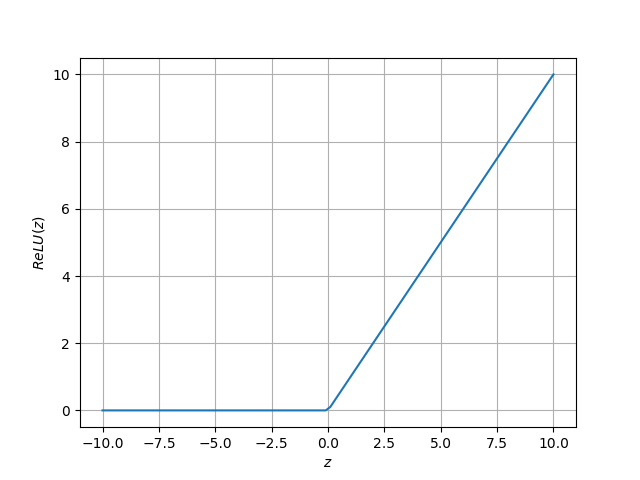

*Función de activación Relu*

\




Nos dimos cuenta que para poder obtener un modelo realmente fiable faltaba añadir más capas convolucionales para poder obtener un reconocimiento más detallado de las imágenes, ya que al añadir nuevas capas, el modelo es cada vez más capaz de encontrar detalles y caracteristicas de cada imagen. Cada capa convolucional se encarga de detectar características en diferentes niveles de abstracción. Por ejemplo, las primeras capas pueden detectar bordes y esquinas, mientras que las capas posteriores pueden detectar patrones más complejos, como formas y texturas. Esto es especialmente importante cuando se trata de reconocer emociones en las caras, ya que pequeños detalles en los ojos, la boca o las cejas pueden ser indicadores clave para identificar una emoción específica, por lo tanto, el modelo tenia que ser lo suficientemente potente como para poder detectar estos detalles.
La decisión de aumentarlas fué principalmente porque vimos una mejora significativa en el rendimiento del modelo cuantas más capas había.
\
Hicimos diferentes pruebas aumentando las capas y vimos que triplicando las capas el modelo obtenia una matriz de confusión correcta, (nos guiamos principalmente por esta medida en conjunto con la curva ROC).
Por ejemplo cuando habia pocas capas la matriz de confusión era esta:
\
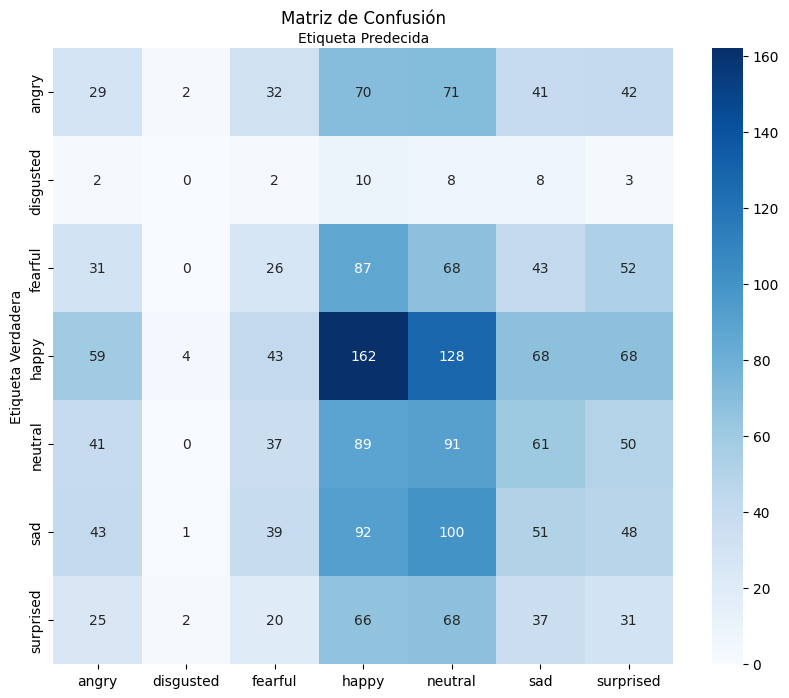
\
*Matriz de confusion de primeros modelos con menos capas*
\

Que vemos que no reconoce gran parte de las emociones correctamente. Entonces en base a la teoría de que cuantas más capas más detalles captura el modelo y viendo los resultados obtenidos decidimos que era el camino correcto.

\

Si aumentabamos más las capas el overfitting aparecia y era más dificil controlarlo con las capas de dropout, además que buscamos hacer el modelo lo menos complejo posible y vimos que con unicamente doblar las capas el modelo se quedaba corto, por lo tanto, optamos con quedarnos con triplicar las capas.

\
Buscamos encontrar un equilibrio entre la capacidad del modelo para capturar características detalladas sin tener sobreajuste.
Para evitar el sobreajuste (a pesar de aumentar el número de capas), hemos usado unas cuantas capas de Dropout repartidas entre el modelo para prevenir situaciones de overfitting y las posibles dependencias que puedan aparecer entre las neuronas. De esta forma evitamos que las neuronas se "especialicen" y reduzcan su efectividad a un solo fragmento del conjunto de datos y asi en la medida de lo posible, controlarlo.
\
Tambien hemos añadido capas de BatchNormalization después de cada una de las capas convolucionales nuevas para estabilizar el proceso de aprendizaje de la red, con una mayor robustez en los datos analizados.
\
Usamos el parámetro padding='same' para asegurar que el tamaño de la salida de la convolución sea el mismo que el tamaño de la entrada, esto puede ayudar a evitar la pérdida de información en los bordes de la imagen durante el proceso de convolución, ya que al añadirle zoom aleatorio hay veces que las caras se quedan muy ajustadas a los bordes de las imagenes.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

# Define el número de clases
num_classes = len(ordered_class_names)

# Define la forma de entrada
input_shape = (48, 48, 1)

# Crea un modelo secuencial
model2 = tf.keras.Sequential([
    # Capa de convolución 1
    Conv2D(32, (5, 5), padding='same', input_shape=input_shape),  # 32 filtros, tamaño del kernel (5, 5)
    Activation('relu'),
    BatchNormalization(),

    # Capa de convolución 2
    Conv2D(32, (5, 5), padding='same',input_shape=input_shape),  # 32 filtros, tamaño del kernel (5, 5)
    Activation('relu'),
    BatchNormalization(),

    # Capa de Max Pooling 1
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling con tamaño de ventana (2, 2)
    Dropout(0.25),  # Dropout con tasa de regularización 0.25

    # Capa de convolución 3
    Conv2D(64, (5, 5), padding='same'),  # 64 filtros, tamaño del kernel (5, 5)
    Activation('relu'),
    BatchNormalization(),

    # Capa de convolución 4
    Conv2D(64, (5, 5), padding='same'),  # 64 filtros, tamaño del kernel (5, 5)
    Activation('relu'),
    BatchNormalization(),

    # Capa de Max Pooling 2
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling con tamaño de ventana (2, 2)
    Dropout(0.5),  # Dropout con tasa de regularización 0.5

    # Capa de convolución 5
    Conv2D(128, (3, 3), padding='same'),  # 128 filtros, tamaño del kernel (3, 3)
    Activation('relu'),
    BatchNormalization(),

    # Capa de convolución 6
    Conv2D(128, (3, 3), padding='same'),  # 128 filtros, tamaño del kernel (3, 3)
    Activation('relu'),
    BatchNormalization(),

    # Capa de Max Pooling 3
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling con tamaño de ventana (2, 2)
    Dropout(0.25),  # Dropout con tasa de regularización 0.25

    # Capa de convolución 7
    Conv2D(256, (3, 3), padding='same'),  # 256 filtros, tamaño del kernel (3, 3)
    Activation('relu'),
    BatchNormalization(),

    # Capa de convolución 8
    Conv2D(256, (3, 3), padding='same'),  # 256 filtros, tamaño del kernel (3, 3)
    Activation('relu'),
    BatchNormalization(),

    # Capa de Max Pooling 4
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling con tamaño de ventana (2, 2)
    Dropout(0.25),  # Dropout con tasa de regularización 0.25

    # Capa de aplanamiento
    Flatten(),

    # Capa completamente conectada 1
    Dense(512),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.25),  # Dropout con tasa de regularización 0.25

    # Capa completamente conectada 2
    Dense(512),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),  # Dropout con tasa de regularización 0.5

    # Capa de salida
    Dense(num_classes),
    Activation('softmax')
])



# **Ejecucción de Modelo 1 vs Modelo 2**

In [ ]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # use this if categorical problem and labels are one-hot encoded
    metrics=['accuracy'])


model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # use this if categorical problem and labels are one-hot encoded
    metrics=['accuracy'])



In [ ]:
history_1 = model1.fit(x = train_generator,epochs = 10 ,validation_data = validation_generator)

Epoch 1/10
315/315 [==============================] - 41s 75ms/step - loss: 1.7995 - accuracy: 0.2551 - val_loss: 1.7674 - val_accuracy: 0.2725
Epoch 2/10
315/315 [==============================] - 18s 58ms/step - loss: 1.7486 - accuracy: 0.2858 - val_loss: 1.6748 - val_accuracy: 0.3375
Epoch 3/10
315/315 [==============================] - 19s 60ms/step - loss: 1.7048 - accuracy: 0.3090 - val_loss: 1.6132 - val_accuracy: 0.3739
Epoch 4/10
315/315 [==============================] - 18s 57ms/step - loss: 1.6629 - accuracy: 0.3368 - val_loss: 1.5457 - val_accuracy: 0.4091
Epoch 5/10
315/315 [==============================] - 20s 63ms/step - loss: 1.6258 - accuracy: 0.3546 - val_loss: 1.5042 - val_accuracy: 0.4258
Epoch 6/10
315/315 [==============================] - 19s 61ms/step - loss: 1.5892 - accuracy: 0.3785 - val_loss: 1.4955 - val_accuracy: 0.4207
Epoch 7/10
315/315 [==============================] - 18s 58ms/step - loss: 1.5610 - accuracy: 0.3954 - val_loss: 1.4341 - val_accuracy:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

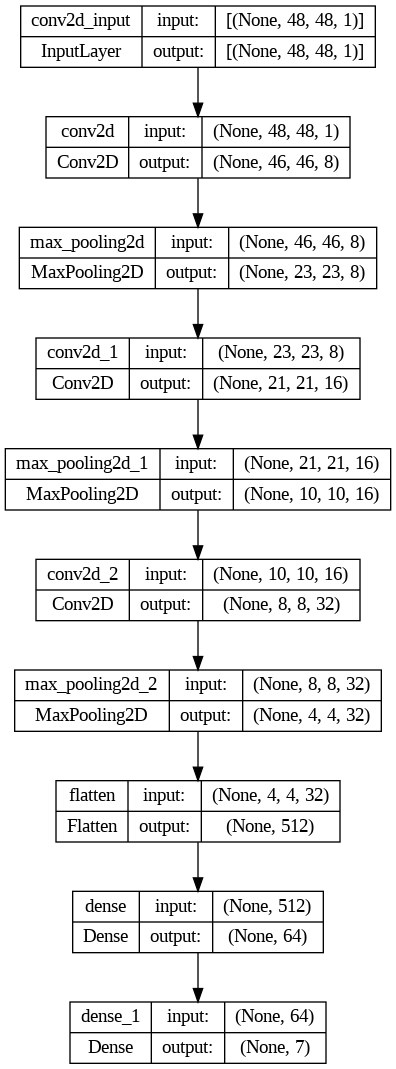

In [ ]:
model1.summary()
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

In [ ]:
history_2 = model2.fit(x = train_generator,epochs = 65 ,validation_data = validation_generator)


Epoch 1/65
315/315 [==============================] - 33s 76ms/step - loss: 2.3423 - accuracy: 0.2021 - val_loss: 1.9109 - val_accuracy: 0.2472
Epoch 2/65
315/315 [==============================] - 25s 78ms/step - loss: 1.9030 - accuracy: 0.2590 - val_loss: 2.1072 - val_accuracy: 0.2635
Epoch 3/65
315/315 [==============================] - 21s 68ms/step - loss: 1.8041 - accuracy: 0.2867 - val_loss: 1.9684 - val_accuracy: 0.2644
Epoch 4/65
315/315 [==============================] - 23s 72ms/step - loss: 1.7325 - accuracy: 0.3184 - val_loss: 2.1248 - val_accuracy: 0.2615
Epoch 5/65
315/315 [==============================] - 25s 78ms/step - loss: 1.6294 - accuracy: 0.3622 - val_loss: 1.6499 - val_accuracy: 0.3612
Epoch 6/65
315/315 [==============================] - 21s 68ms/step - loss: 1.5749 - accuracy: 0.3893 - val_loss: 1.4837 - val_accuracy: 0.4359
Epoch 7/65
315/315 [==============================] - 24s 76ms/step - loss: 1.5240 - accuracy: 0.4032 - val_loss: 1.4599 - val_accuracy:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        832       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        25632     
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                      

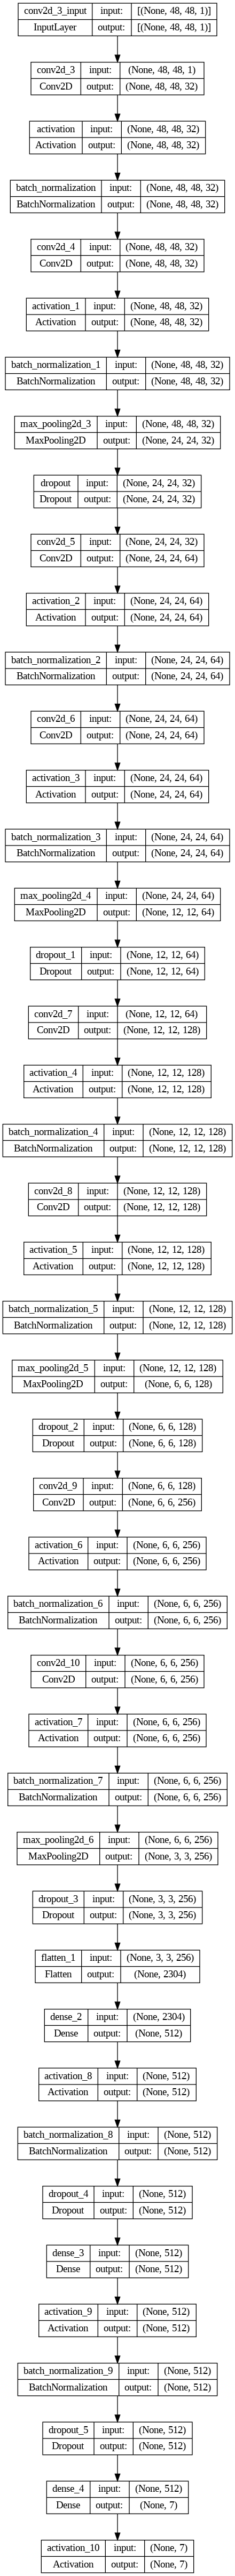

In [ ]:
model2.summary()
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

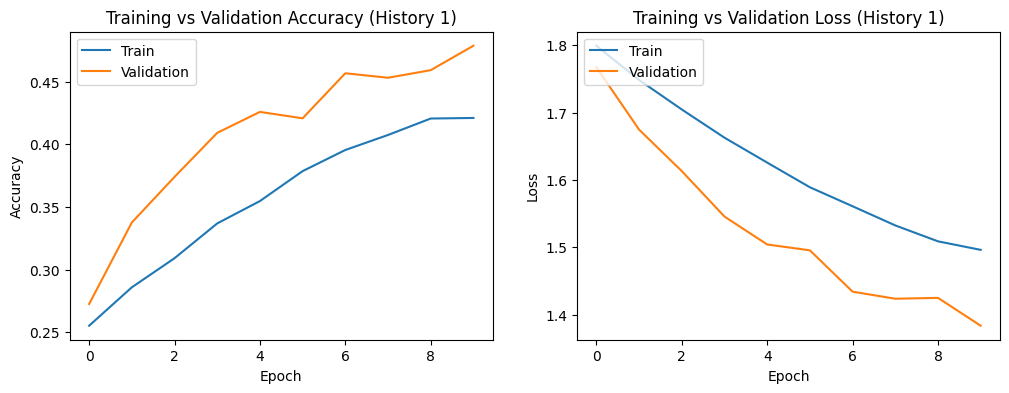

In [ ]:
fig, ax = plt.subplots(1, 2)

train_acc_1 = history_1.history['accuracy']
train_loss_1 = history_1.history['loss']
fig.set_size_inches(12, 4)

ax[0].plot(train_acc_1)
ax[0].plot(history_1.history['val_accuracy'])
ax[0].set_title('Training vs Validation Accuracy (History 1)')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(train_loss_1)
ax[1].plot(history_1.history['val_loss'])
ax[1].set_title('Training vs Validation Loss (History 1)')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


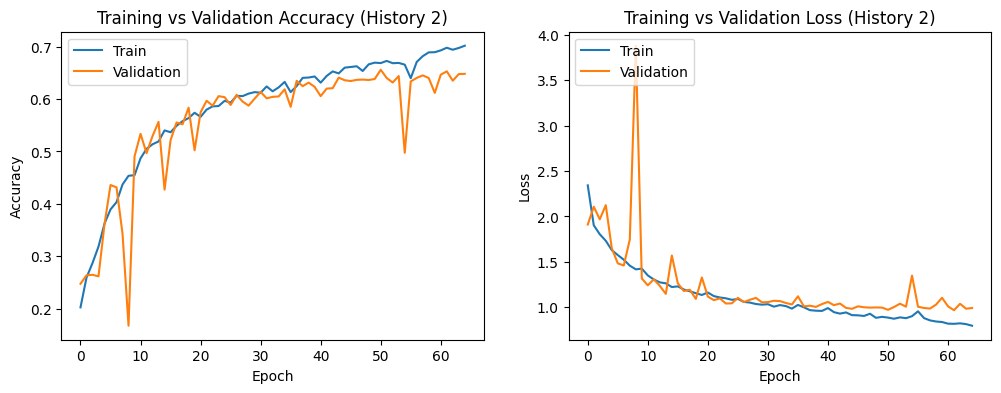

In [ ]:
fig, ax = plt.subplots(1, 2)

train_acc_2 = history_2.history['accuracy']
train_loss_2 = history_2.history['loss']
fig.set_size_inches(12, 4)

ax[0].plot(train_acc_2)
ax[0].plot(history_2.history['val_accuracy'])
ax[0].set_title('Training vs Validation Accuracy (History 2)')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(train_loss_2)
ax[1].plot(history_2.history['val_loss'])
ax[1].set_title('Training vs Validation Loss (History 2)')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
train_loss1, test_acc1 = model1.evaluate(train_generator)


315/315 [==============================] - 16s 51ms/step - loss: 1.4672 - accuracy: 0.4375


In [ ]:
train_loss2, test_acc2  = model2.evaluate(train_generator)

315/315 [==============================] - 18s 56ms/step - loss: 0.6505 - accuracy: 0.7580


#**MODELO 2**



**MATRIZ DE CONFUSION**

101/101 [==============================] - 2s 21ms/step
              precision    recall  f1-score   support

       angry       0.55      0.59      0.57       862
   disgusted       0.48      0.61      0.54        99
     fearful       0.52      0.43      0.47       921
       happy       0.86      0.84      0.85      1596
     neutral       0.53      0.73      0.62      1109
         sad       0.59      0.42      0.49      1122
   surprised       0.78      0.79      0.78       747

    accuracy                           0.65      6456
   macro avg       0.62      0.63      0.62      6456
weighted avg       0.65      0.65      0.64      6456





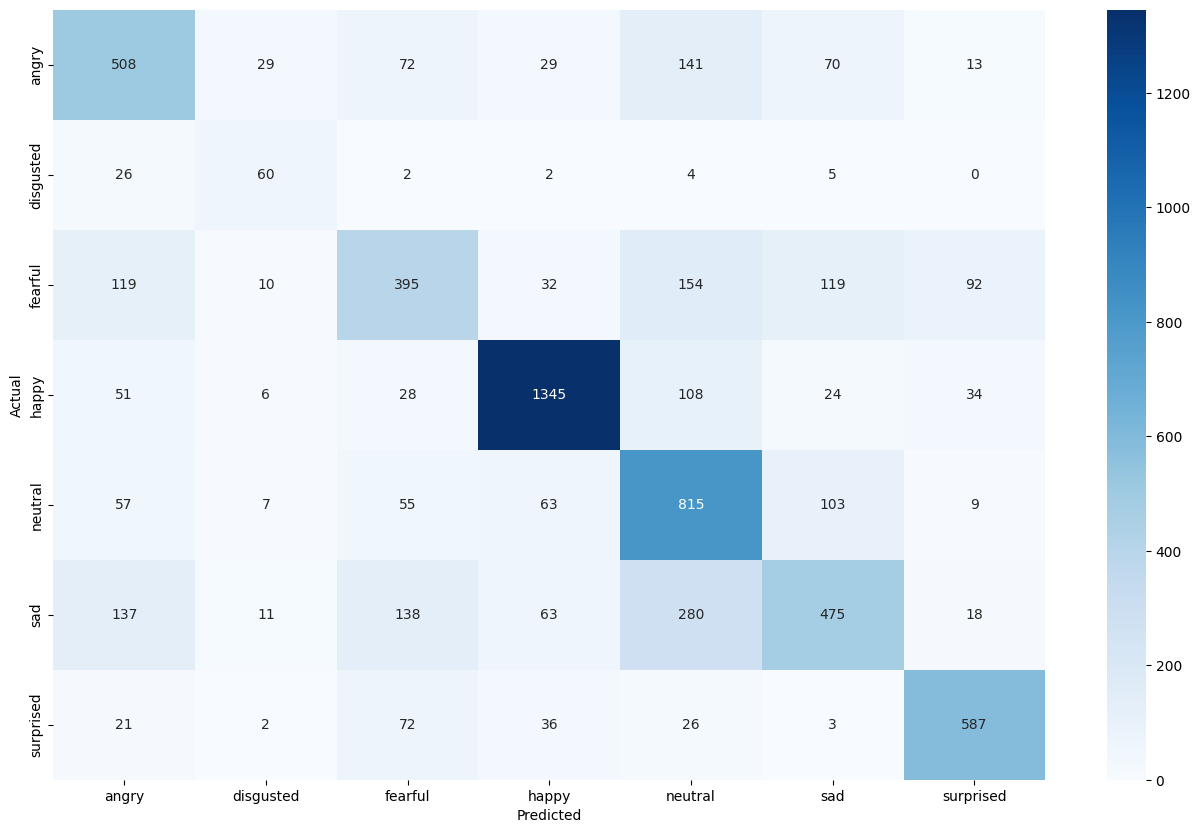

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = model2
y_pred = np.argmax(model.predict(validation_generator), axis=-1)
class_labels = list(validation_generator.class_indices.keys())

print(classification_report(validation_generator.classes, y_pred, target_names=class_labels), end='\n\n\n')

cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(16, 10))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='.0f', xticklabels=class_labels, yticklabels=class_labels)

# Agregar etiquetas "Predicted" y "Actual"
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


**GRÁFICA DE FALSOS VS VERDADEROS POSITIVOS**

**La curva ROC** (curva de característica operativa del receptor) es un gráfico que muestra el rendimiento de un modelo de clasificación y que a diferencia de otras metricas proporciona una representación gráfica en lugar de un solo valor.
Esta se traza calculando y trazando la tasa de verdaderos positivos contra la tasa de falsos positivos.

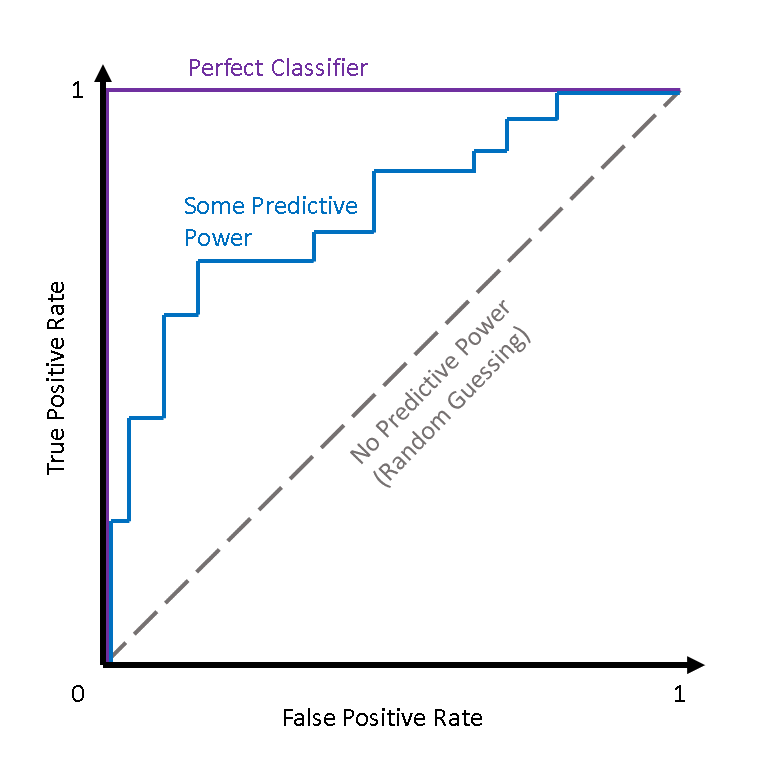
\
*Interpretación de la curva en tres diferentes posibles casos*
\
Como vemos el modelo en la mayor parte de las 7 clasificaciones siguen el primer caso (violeta), por lo tanto, aseguramos que el modelo es bueno clasificando en todas las clasificaciones, ya que en estas conseguimos una alta tasa de verdaderos positivos y al mismo una baja tasa de falsos positivos.


Para resumir la curva utilizamos el AUC score (área bajo la curva) .
El ROC AUC score cuanto más cercano a 1 significa que es mejor el rendimiento de un clasificador y cuanto más a 0 peor. En este caso obtenemos un valor cercano a 1 (0.922695056841418).


101/101 [==============================] - 2s 22ms/step
ROC AUC score: 0.922695056841418


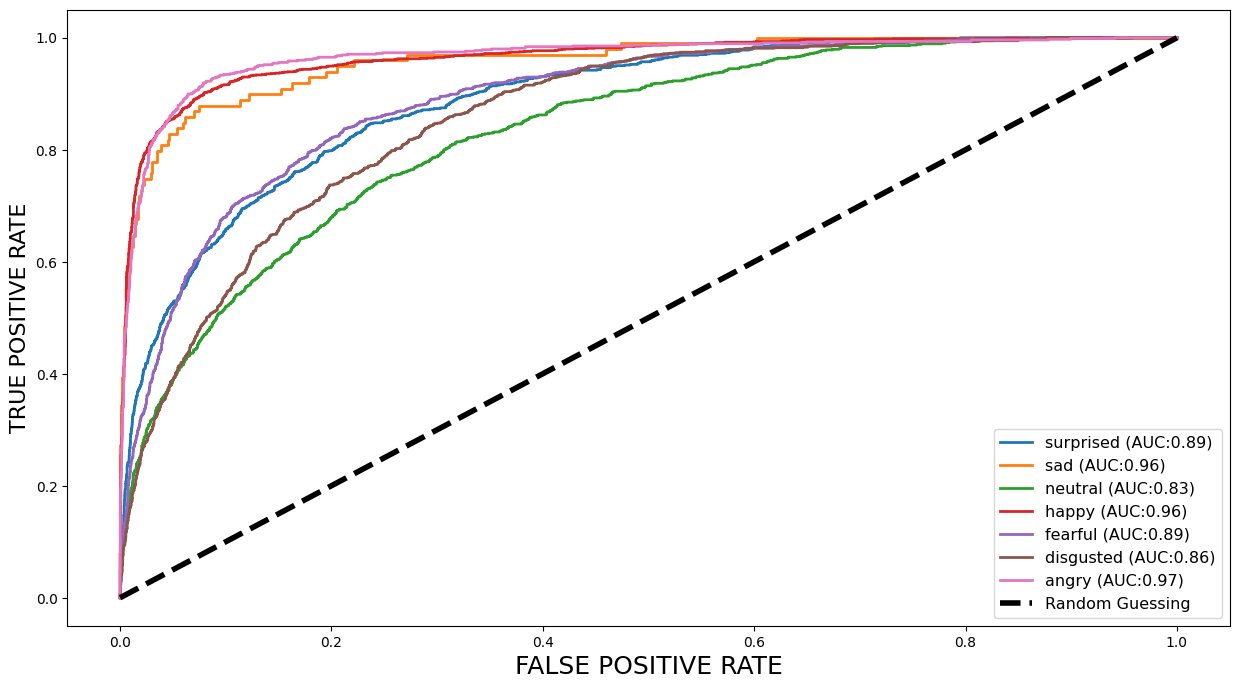

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

CLASS_LABELS = ordered_class_names

fig, c_ax = plt.subplots(1, 1, figsize=(15, 8))

y_pred = model2.predict(validation_generator)
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:, idx].astype(int), y_pred[:, idx])
        c_ax.plot(fpr, tpr, lw=2, label='%s (AUC:%0.2f)' % (c_label, roc_auc_score(y_test[:, idx], y_pred[:, idx])))
    c_ax.plot(fpr, fpr, 'black', linestyle='dashed', lw=4, label='Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(validation_generator.classes, y_pred, average="micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize=11.5)
plt.show()


# **Conclusiones finales**
El modelo 2 es considerablemente mejor que el 1, que solo llega a una acuraccy del 0.4375.
\

El modelo 2, vemos que alcanza un máximo de accuraccy de 0.7580, y que durante toda las epochs mejora su aprendizaje.

Como vemos en la matriz de confusión, la diagonal es la que tiene mejores datos, por lo tanto, podemos decir que el modelo reconoce correctamente los datos.

En la gráfica de la training vs validation acuraccy, vemos un pico que se puede deber a que hay algunas imagenes del test set que son erroneas y no tienen caras sino que son imagenes totalmente negras y por lo tanto el modelo ha sido incapaz de recononcer nada.

Otra decision importante que hemos tenido después de analizar los resultados que nos da el modelo y los datasets, es que hay algunos casos, en que el modelo si lo consideramos segun la clasificación de las imagenes dada, es erroneo, pero viendo la foto, en la mayor parte de situaciones la intepretación que da es correcta o muy aproximada.


Un ejemplo es esta clasificación de imagen que perfectamente una podria estar en la otra :

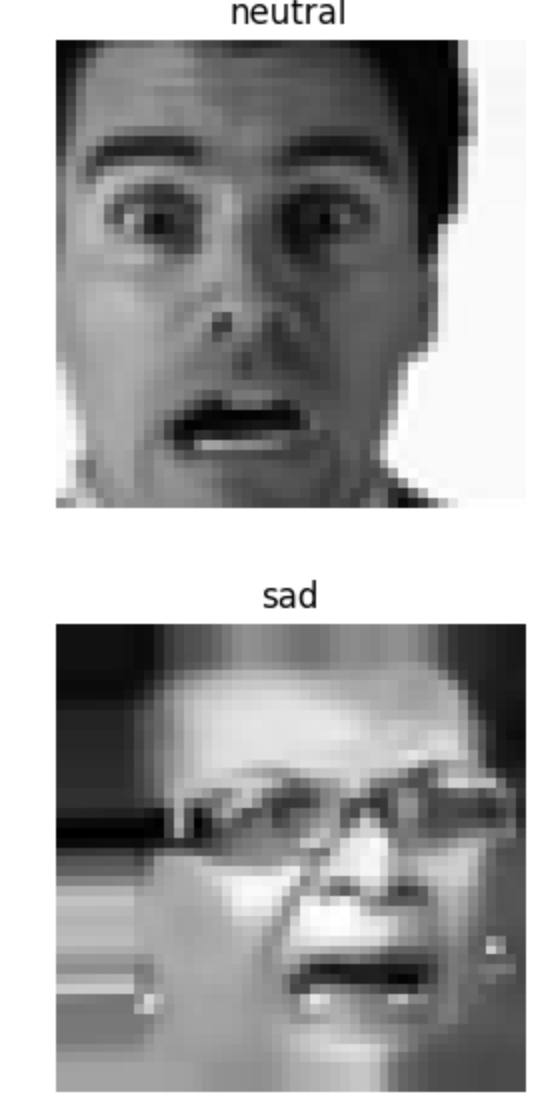